# 각 개별 jupyter note 에서 전처리후, pickle 또는 csv 저장

1. 전국 일방통행 도로 표준데이터
- 시도명, 지정사유, 지정연도, 도로폭, 도로차수, 보차분리여부

2. 전국 어린이 보호구역 표준데이터 시도명 작업필요
- 시설종류, 관할경찰서명, CCTV설치여부, CCTV설치대수, 제공기관명, 보호구역도로폭

3. 전국 노인 장애인 보호 구역 표준데이터
- 시도명, 제한속도, CCTV설치여부, CCTV설치대수, 보호구역 도로폭

4. 새로운 Jupyter note 에서종합.
- 시도명, 어린이보호구역 CCTV 설치대수, 노인장애인보호구역 CCTV 설치대수, 일방통행 보차분리 ycount

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd_old = pd.read_csv('전국노인장애인도로표준데이터1.csv', encoding = 'cp949')
pd_child = pd.read_csv('전국어린이보호구역데이터.csv', encoding = 'cp949')
pd_one = pd.read_csv('전국일방통행도로데이터.csv', encoding = 'cp949')

In [37]:

old = pd_old[['시도명', 'CCTV설치대수']]
child = pd_child[['시도명', 'CCTV설치대수']]
one = pd_one[['시도명', '보차분리여부']]

old = old.groupby('시도명').sum()
child = child.groupby('시도명').sum()

one.loc[one['보차분리여부'] == 'Y', '보차분리여부'] = 1
one.loc[one['보차분리여부'] == 'N', '보차분리여부'] = 0 
one = one.groupby('시도명').sum()

/var/folders/br/8bbtv7t175s4k3b2shs9n46m0000gn/T/ipykernel_3192/45813397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one.loc[one['보차분리여부'] == 'Y', '보차분리여부'] = 1
/var/folders/br/8bbtv7t175s4k3b2shs9n46m0000gn/T/ipykernel_3192/45813397.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one.loc[one['보차분리여부'] == 'N', '보차분리여부'] = 0


In [38]:
child = child.merge(old, on='시도명', how='outer')


In [39]:
final = child.merge(one, on='시도명', how='outer')

In [40]:
final['어린이보호구역CCTV'] = final['CCTV설치대수_x']
final['노인보호구역CCTV'] = final['CCTV설치대수_y']
final['일방통행보차분리여부'] = final['보차분리여부']

final.drop('CCTV설치대수_x', axis = 1, inplace = True)
final.drop('CCTV설치대수_y', axis = 1, inplace = True)
final.drop('보차분리여부', axis = 1, inplace = True)

In [43]:
final.reset_index(inplace = True)


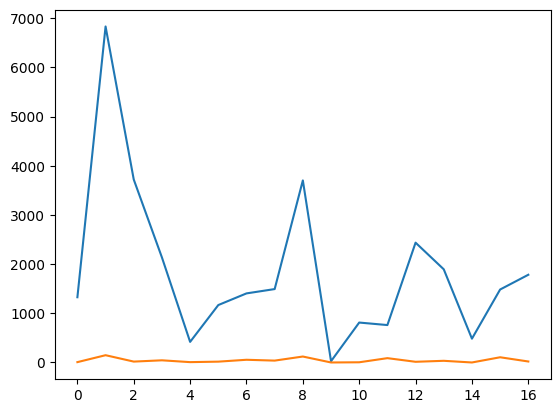

In [44]:
_, axe = plt.subplots()
axe.plot(final['어린이보호구역CCTV'])
axe.plot(final['노인보호구역CCTV'])

In [48]:
final['어린이보호구역CCTV'].describe()
child_min = final['어린이보호구역CCTV'].min()
child_max = final['어린이보호구역CCTV'].max()

final['child_cctv'] = final['어린이보호구역CCTV'].apply(lambda x: (x- child_min) / (child_max - child_min))
print(final['child_cctv'])

0     0.191099
1     1.000000
2     0.542744
3     0.309929
4     0.057726
5     0.167744
6     0.202556
7     0.215482
8     0.540100
9     0.000000
10    0.115452
11    0.107961
12    0.354142
13    0.274530
14    0.067274
15    0.214160
16    0.258226
Name: child_cctv, dtype: float64


In [49]:
final['노인보호구역CCTV'].describe()
old_min = final['노인보호구역CCTV'].min()
old_max = final['노인보호구역CCTV'].max()

final['old_cctv'] = final['노인보호구역CCTV'].apply(lambda x: (x- old_min) / (old_max - old_min))
print(final['old_cctv'])

0     0.047297
1     1.000000
2     0.121622
3     0.297297
4     0.047297
5     0.114865
6     0.371622
7     0.256757
8     0.817568
9     0.000000
10    0.027027
11    0.594595
12    0.094595
13    0.229730
14    0.000000
15    0.716216
16    0.135135
Name: old_cctv, dtype: float64


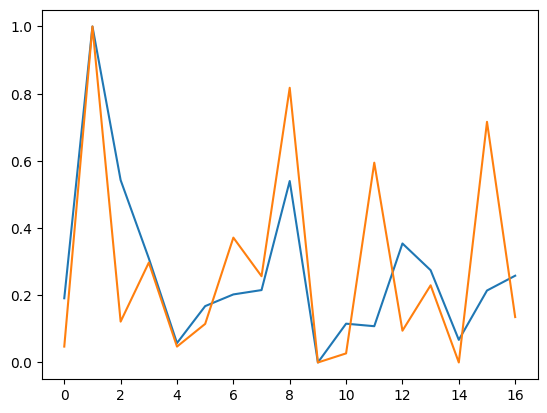

In [50]:
_, axe = plt.subplots()
axe.plot(final['child_cctv'])
axe.plot(final['old_cctv'])

In [57]:
df1 = pd_child[['CCTV설치여부', 'CCTV설치대수', '시도명']]
df2 = pd_old[['CCTV설치여부', 'CCTV설치대수', '시도명']]
print(df1.head())
print(df2.head())
df12 = pd.concat((df1, df2), axis = 0, keys=['어린이', '노인장애인'])
df12

  CCTV설치여부  CCTV설치대수   시도명
0        Y       1.0  전라북도
1        Y       2.0  전라북도
2        Y       1.0  전라북도
3        Y       2.0  전라북도
4        Y       1.0  전라북도
  CCTV설치여부  CCTV설치대수    시도명
0        Y       1.0  서울특별시
1        N       0.0   경상북도
2        N       0.0   경상북도
3        N       0.0   경상북도
4        N       0.0   경상북도


CCTV설치여부  CCTV설치대수    시도명
어린이   0           Y       1.0   전라북도
      1           Y       2.0   전라북도
      2           Y       1.0   전라북도
      3           Y       2.0   전라북도
      4           Y       1.0   전라북도
...             ...       ...    ...
노인장애인 2513        N       0.0  대구광역시
      2514        N       0.0  대구광역시
      2515        N       0.0  대구광역시
      2516        N       0.0  대구광역시
      2517        N       0.0  대구광역시

[17574 rows x 3 columns]